In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## import CSV file

In [2]:
df = pd.read_csv('loan.csv')

/home/surajit/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Check with head

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
(df.iloc[:,4]).dtypes

dtype('float64')

In [5]:
df["member_id"].value_counts()

399649     1
826287     1
803517     1
875198     1
1069759    1
          ..
1031485    1
403074     1
677184     1
1066306    1
864250     1
Name: member_id, Length: 39717, dtype: int64

In [6]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
df.shape

(39717, 111)

In [8]:
df["member_id"].isnull().sum()

0

In [9]:
(df.iloc[:,110]).isnull().sum()

39717

## column to delete if all are null values

In [10]:
x, y = df.shape
column_to_be_deleted = []
for i in range(y):
    null_count = ((df.iloc[:,i]).isnull().sum())
    if (null_count==x):
        column_to_be_deleted.append(i)
        
df.drop(df.columns[column_to_be_deleted], axis=1, inplace=True)

In [11]:
df.shape

(39717, 57)

In [12]:
e = df.isnull().sum(axis=1)

In [13]:
e.sort_values(ascending=False)

39660    8
39659    8
39715    7
39714    7
39650    7
        ..
11439    0
12717    0
9898     0
656      0
13631    0
Length: 39717, dtype: int64

In [14]:
e

0        4
1        3
2        5
3        2
4        1
        ..
39712    5
39713    5
39714    7
39715    7
39716    5
Length: 39717, dtype: int64

In [15]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [16]:
df.shape

(39717, 57)

In [17]:
df.isnull().sum().sort_values(ascending=False)

next_pymnt_d                  38577
mths_since_last_record        36931
mths_since_last_delinq        25682
desc                          12940
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
home_ownership                    0
int_rate                          0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
term                              0
last_pymnt_amnt                   0
initial_list_status               0
funded_amnt_inv             

## check application_type if same values

In [18]:
df["application_type"].value_counts()

INDIVIDUAL    39717
Name: application_type, dtype: int64

## drop as same value

In [19]:
df = df.drop('application_type', 1)

## check and drop if column has same value

In [20]:
x, y = df.shape
column_to_be_deleted = []
for i in range(y):
    category_count = ((df.iloc[:,i]).value_counts().size)
    if (category_count==1):
        column_to_be_deleted.append(i)
        
df.drop(df.columns[column_to_be_deleted], axis=1, inplace=True)

In [21]:
df.shape

(39717, 48)

In [22]:
df["id"].value_counts().size

39717

In [23]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


In [24]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [25]:
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

## column and type

In [26]:
x, y = df.shape

for i in range(y):
    print(df.columns[i] + "\t\t" + str((df.iloc[:,i]).dtypes))

id		int64
member_id		int64
loan_amnt		int64
funded_amnt		int64
funded_amnt_inv		float64
term		object
int_rate		object
installment		float64
grade		object
sub_grade		object
emp_title		object
emp_length		object
home_ownership		object
annual_inc		float64
verification_status		object
issue_d		object
loan_status		object
url		object
desc		object
purpose		object
title		object
zip_code		object
addr_state		object
dti		float64
delinq_2yrs		int64
earliest_cr_line		object
inq_last_6mths		int64
mths_since_last_delinq		float64
mths_since_last_record		float64
open_acc		int64
pub_rec		int64
revol_bal		int64
revol_util		object
total_acc		int64
out_prncp		float64
out_prncp_inv		float64
total_pymnt		float64
total_pymnt_inv		float64
total_rec_prncp		float64
total_rec_int		float64
total_rec_late_fee		float64
recoveries		float64
collection_recovery_fee		float64
last_pymnt_d		object
last_pymnt_amnt		float64
next_pymnt_d		object
last_credit_pull_d		object
pub_rec_bankruptcies		float64


## convert funded_amnt_inv as float

In [27]:
df['funded_amnt_inv'] = df['funded_amnt_inv'].astype(float)

In [28]:
df['term'].value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

## remove months from term and convert it to int

In [29]:
df['term'] = df['term'].apply(lambda x : x.replace(' months', ''))

In [30]:
df['term'].value_counts()

 36    29096
 60    10621
Name: term, dtype: int64

In [31]:
df['term'] = df['term'].astype(int)

In [32]:
df['int_rate'].value_counts()

10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.01%      1
17.34%      1
17.54%      1
20.52%      1
Name: int_rate, Length: 371, dtype: int64

## convert int_rate to float

In [33]:
df['int_rate'] = df['int_rate'].apply(lambda x : x.replace('%', ''))

In [34]:
df['int_rate'] = df['int_rate'].astype(float)

In [35]:
df['grade'].value_counts()

B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64

In [36]:
df['sub_grade'].value_counts()

B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: sub_grade, dtype: int64

In [37]:
df["last_credit_pull_d"].value_counts()

May-16    10308
Apr-16     2547
Mar-16     1123
Feb-13      843
Feb-16      736
          ...  
Jun-08        1
May-08        1
Jul-08        1
May-07        1
Jul-07        1
Name: last_credit_pull_d, Length: 106, dtype: int64

In [38]:
x, y = df.shape

for i in range(y):
    print(df.columns[i] + "\t\t" + str((df.iloc[:,i]).dtypes))

id		int64
member_id		int64
loan_amnt		int64
funded_amnt		int64
funded_amnt_inv		float64
term		int64
int_rate		float64
installment		float64
grade		object
sub_grade		object
emp_title		object
emp_length		object
home_ownership		object
annual_inc		float64
verification_status		object
issue_d		object
loan_status		object
url		object
desc		object
purpose		object
title		object
zip_code		object
addr_state		object
dti		float64
delinq_2yrs		int64
earliest_cr_line		object
inq_last_6mths		int64
mths_since_last_delinq		float64
mths_since_last_record		float64
open_acc		int64
pub_rec		int64
revol_bal		int64
revol_util		object
total_acc		int64
out_prncp		float64
out_prncp_inv		float64
total_pymnt		float64
total_pymnt_inv		float64
total_rec_prncp		float64
total_rec_int		float64
total_rec_late_fee		float64
recoveries		float64
collection_recovery_fee		float64
last_pymnt_d		object
last_pymnt_amnt		float64
next_pymnt_d		object
last_credit_pull_d		object
pub_rec_bankruptcies		float64


In [39]:
df.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
url                            0
desc                       12940
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
pub_rec   

In [40]:
df.shape

(39717, 48)

## drop column which has maximum null value

In [41]:
df = df.drop(["next_pymnt_d", "mths_since_last_record"], 1)

In [42]:
df.shape

(39717, 46)

In [43]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36,8.07,78.42,A,A4,...,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,NaN
39713,90665,90607,8500,8500,875.0,36,10.28,275.38,C,C1,...,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10,NaN
39714,90395,90390,5000,5000,1325.0,36,8.07,156.84,A,A4,...,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,Jun-07,NaN
39715,90376,89243,5000,5000,650.0,36,7.43,155.38,A,A2,...,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,Jun-07,NaN


In [44]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

## Check percentage of missing data

In [45]:
((df.isnull().sum() * 100 / len(df)).sort_values(
    ascending=False)).head(11)

mths_since_last_delinq    64.662487
desc                      32.580507
emp_title                  6.191303
emp_length                 2.706650
pub_rec_bankruptcies       1.754916
last_pymnt_d               0.178765
revol_util                 0.125891
title                      0.027696
last_credit_pull_d         0.005036
out_prncp                  0.000000
open_acc                   0.000000
dtype: float64

## dropping as mximum no of null values (> 30%)

In [46]:
df = df.drop(['mths_since_last_delinq', 'desc'], 1)

## check percentage of null values

In [47]:
((df.isnull().sum() * 100 / len(df)).sort_values(
    ascending=False)).head(11)

emp_title               6.191303
emp_length              2.706650
pub_rec_bankruptcies    1.754916
last_pymnt_d            0.178765
revol_util              0.125891
title                   0.027696
last_credit_pull_d      0.005036
last_pymnt_amnt         0.000000
out_prncp_inv           0.000000
open_acc                0.000000
pub_rec                 0.000000
dtype: float64

In [48]:
df["last_credit_pull_d"].value_counts()

May-16    10308
Apr-16     2547
Mar-16     1123
Feb-13      843
Feb-16      736
          ...  
Jun-08        1
May-08        1
Jul-08        1
May-07        1
Jul-07        1
Name: last_credit_pull_d, Length: 106, dtype: int64

## check how many rows has last_credit_pull_d as null

In [49]:
df[df["last_credit_pull_d"].isnull()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
26025,575712,740467,5000,5000,5000.0,36,11.12,163.98,B,B3,...,3362.96,2553.55,702.45,0.0,106.96,1.34,Jun-12,163.98,NaN,0.0
39476,186499,186347,1000,1000,875.0,36,7.12,30.94,A,A1,...,971.96,1000.00,110.81,0.0,0.00,0.00,Aug-10,185.80,NaN,NaN


In [50]:
df["title"].value_counts()

Debt Consolidation                  2184
Debt Consolidation Loan             1729
Personal Loan                        659
Consolidation                        517
debt consolidation                   505
                                    ... 
DEBT CONSOLIDATION                     1
Unexpected Debt!                       1
Purchasing Landscape CAD Program       1
LifeInOrderLoad                        1
Queen Ann                              1
Name: title, Length: 19615, dtype: int64

In [51]:
df[df["title"].isnull()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
25188,588911,756574,8000,8000,8000.000000,36,19.79,296.46,F,F5,...,9758.88,8000.00,1758.88,0.0,0.0,0.00,Feb-12,5314.13,May-16,0.0
27477,552630,708107,20000,20000,19852.540000,60,16.32,489.77,D,D5,...,29152.20,20000.00,9386.04,0.0,0.0,0.00,Aug-15,509.53,May-16,0.0
28469,534867,691222,13750,13750,13750.000000,60,16.32,336.72,D,D5,...,20202.80,13750.00,6452.80,0.0,0.0,0.00,Jul-15,352.03,Jul-15,0.0
28700,533057,689005,10000,10000,10000.000000,60,11.49,219.88,B,B4,...,3231.08,1704.13,1144.95,0.0,382.0,3.88,Aug-11,219.88,Jan-12,0.0
28710,533761,689914,1800,1800,1800.000000,36,14.84,62.26,D,D1,...,2241.39,1800.00,441.39,0.0,0.0,0.00,Jul-13,68.26,Jul-13,0.0
28716,533665,689802,6000,6000,5950.000000,36,11.49,197.83,B,B4,...,7062.55,6000.00,1121.90,0.0,0.0,0.00,Jul-13,216.31,Jul-13,0.0
28985,529210,641328,24000,15200,9200.020000,60,17.19,379.32,E,E3,...,2019.50,1179.69,1472.96,0.0,0.0,0.00,Jan-11,379.32,May-16,0.0
29008,528842,683949,1300,1300,1250.000000,36,13.61,44.19,C,C2,...,1519.86,1300.00,280.65,0.0,0.0,0.00,Dec-12,305.50,May-16,0.0
30307,510485,659169,5600,5600,5600.000000,36,11.36,184.31,B,B5,...,6635.27,5600.00,1035.27,0.0,0.0,0.00,May-13,191.94,May-16,0.0
31575,493558,631512,8000,8000,7000.000000,36,7.14,247.52,A,A3,...,7122.10,8000.00,139.50,0.0,0.0,0.00,Jul-10,2.51,Jul-10,0.0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  int64  
 6   int_rate                 39717 non-null  float64
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [53]:
df.isnull().sum(axis=1).sort_values(ascending=False).head(11)

32545    3
16719    3
28980    3
24984    3
28547    3
14839    3
4714     3
11282    3
28700    3
39476    3
27926    2
dtype: int64

## try deleting rows which has 3 column null

In [54]:
df=df[~(df.isnull().sum(axis=1) > 2)]

## check percentage of null values

In [55]:
## check percentage of null values
((df.isnull().sum() * 100 / len(df)).sort_values(
    ascending=False)).head(11)

emp_title               6.167678
emp_length              2.684665
pub_rec_bankruptcies    1.752840
last_pymnt_d            0.166218
revol_util              0.118367
title                   0.025184
last_credit_pull_d      0.002518
last_pymnt_amnt         0.000000
out_prncp_inv           0.000000
open_acc                0.000000
pub_rec                 0.000000
dtype: float64

In [56]:
df.shape

(39707, 44)

## there is no need of id

In [57]:
del df["id"]

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39707 entries, 0 to 39716
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   member_id                39707 non-null  int64  
 1   loan_amnt                39707 non-null  int64  
 2   funded_amnt              39707 non-null  int64  
 3   funded_amnt_inv          39707 non-null  float64
 4   term                     39707 non-null  int64  
 5   int_rate                 39707 non-null  float64
 6   installment              39707 non-null  float64
 7   grade                    39707 non-null  object 
 8   sub_grade                39707 non-null  object 
 9   emp_title                37258 non-null  object 
 10  emp_length               38641 non-null  object 
 11  home_ownership           39707 non-null  object 
 12  annual_inc               39707 non-null  float64
 13  verification_status      39707 non-null  object 
 14  issue_d               

In [59]:
df["member_id"].value_counts().sort_values(ascending=False)

399649     1
848173     1
718879     1
909340     1
972827     1
          ..
419818     1
423921     1
1267701    1
1003510    1
864250     1
Name: member_id, Length: 39707, dtype: int64

## delete member id as its a uique no like id

In [60]:
del df["member_id"]

In [61]:
df.shape

(39707, 42)

## check percentage of null values

In [62]:
## check percentage of null values
((df.isnull().sum() * 100 / len(df)).sort_values(
    ascending=False)).head(11)

emp_title               6.167678
emp_length              2.684665
pub_rec_bankruptcies    1.752840
last_pymnt_d            0.166218
revol_util              0.118367
title                   0.025184
last_credit_pull_d      0.002518
total_pymnt             0.000000
pub_rec                 0.000000
revol_bal               0.000000
total_acc               0.000000
dtype: float64

## Deleting title column having random values, we can cosider purpose column

In [63]:
df = df.drop(['title'], axis=1)

## emp_length_years calculate from emp_length

In [64]:
df['emp_length_years'] = df['emp_length'].str.rstrip('years ')
df['emp_length_years'].replace({'10+': '10'}, inplace=True)
df['emp_length_years'][df['emp_length_years'] == '< 1'] = '0.5'
del df['emp_length']

<ipython-input-64-97a2f7fe3567>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['emp_length_years'][df['emp_length_years'] == '< 1'] = '0.5'


In [65]:
df['emp_length_years'].value_counts()

10     8879
0.5    4582
2      4388
3      4095
4      3436
5      3282
1      3240
6      2229
7      1773
8      1479
9      1258
Name: emp_length_years, dtype: int64

In [66]:
## check percentage of null values again
((df.isnull().sum() * 100 / len(df)).sort_values(
    ascending=False)).head(11)

emp_title               6.167678
emp_length_years        2.684665
pub_rec_bankruptcies    1.752840
last_pymnt_d            0.166218
revol_util              0.118367
last_credit_pull_d      0.002518
total_pymnt             0.000000
pub_rec                 0.000000
revol_bal               0.000000
total_acc               0.000000
out_prncp               0.000000
dtype: float64

## emp_title analysis

In [67]:
df["emp_title"].value_counts()

US Army                          134
Bank of America                  109
IBM                               66
AT&T                              59
Kaiser Permanente                 56
                                ... 
Hennes & Mauritz                   1
EcoLab                             1
Kansas City VA Medical Center      1
Teracore,Inc.                      1
IBEW Local #3                      1
Name: emp_title, Length: 28820, dtype: int64

In [68]:
df["emp_title"].isnull().sum()

2449

In [69]:
df["emp_title"]=df["emp_title"].fillna("Missing")

In [70]:
## check percentage of null values again
((df.isnull().sum() * 100 / len(df)).sort_values(
    ascending=False)).head(11)

emp_length_years        2.684665
pub_rec_bankruptcies    1.752840
last_pymnt_d            0.166218
revol_util              0.118367
last_credit_pull_d      0.002518
total_pymnt             0.000000
pub_rec                 0.000000
revol_bal               0.000000
total_acc               0.000000
out_prncp               0.000000
out_prncp_inv           0.000000
dtype: float64

## emp_length_years analysis

In [71]:
df["emp_length_years"].isnull().sum()

1066

In [72]:
df["emp_length_years"].dtypes

dtype('O')

In [73]:
df["emp_length_years"] = df["emp_length_years"].astype(float)

In [74]:
df["emp_length_years"].dtypes

dtype('float64')

In [75]:
df["emp_length_years"].describe()

count    38641.000000
mean         5.032867
std          3.482531
min          0.500000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length_years, dtype: float64

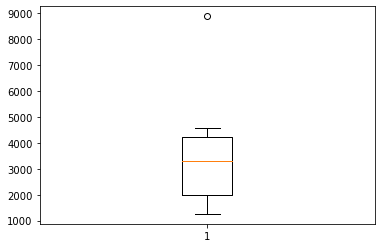

In [76]:
plt.boxplot(df["emp_length_years"].value_counts())
plt.show()

In [77]:
df["emp_length_years"]=df["emp_length_years"].fillna(4.000000)

In [78]:
## check percentage of null values again
((df.isnull().sum() * 100 / len(df)).sort_values(
    ascending=False)).head(11)

pub_rec_bankruptcies    1.752840
last_pymnt_d            0.166218
revol_util              0.118367
last_credit_pull_d      0.002518
loan_amnt               0.000000
total_pymnt             0.000000
pub_rec                 0.000000
revol_bal               0.000000
total_acc               0.000000
out_prncp               0.000000
out_prncp_inv           0.000000
dtype: float64

## pub_rec_bankruptcies analysis

In [79]:
df["pub_rec_bankruptcies"].value_counts()

0.0    37330
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [80]:
df["pub_rec_bankruptcies"].isnull().sum()

696

## as blank and 0 are similar, hence replacing as 0

In [81]:
df["pub_rec_bankruptcies"]=df["pub_rec_bankruptcies"].fillna(0)

In [82]:
df["pub_rec_bankruptcies"].dtypes

dtype('float64')

In [83]:
## check percentage of null values again
((df.isnull().sum() * 100 / len(df)).sort_values(
    ascending=False)).head(11)

last_pymnt_d          0.166218
revol_util            0.118367
last_credit_pull_d    0.002518
loan_amnt             0.000000
total_pymnt_inv       0.000000
pub_rec               0.000000
revol_bal             0.000000
total_acc             0.000000
out_prncp             0.000000
out_prncp_inv         0.000000
total_pymnt           0.000000
dtype: float64

## last_pymnt_d analysis

In [84]:
df["last_pymnt_d"].value_counts()

May-16    1256
Mar-13    1026
Dec-14     945
May-13     907
Feb-13     869
          ... 
Jun-08      10
Nov-08      10
Mar-08       5
Jan-08       4
Feb-08       1
Name: last_pymnt_d, Length: 101, dtype: int64

In [85]:
df["revol_util"].value_counts()

0%        977
0.20%      63
63%        62
40.70%     58
0.10%      58
         ... 
17.67%      1
43.61%      1
0.83%       1
56.26%      1
11.62%      1
Name: revol_util, Length: 1089, dtype: int64

In [86]:
df["revol_util"].isnull().sum()

47

In [87]:
df["revol_util"].dtypes

dtype('O')

In [88]:
df["revol_util"]=df["revol_util"].apply(lambda x : (str(x).replace('%', '')))

In [89]:
df["revol_util"] = df["revol_util"].astype(float)

In [90]:
df["revol_util"].dtypes

dtype('float64')

In [91]:
df["revol_util"].describe()

count    39660.000000
mean        48.833000
std         28.332037
min          0.000000
25%         25.400000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64

In [92]:
df["revol_util"]=df["revol_util"].fillna(df["revol_util"].quantile(0.5))

In [93]:
## check percentage of null values again
((df.isnull().sum() * 100 / len(df)).sort_values(
    ascending=False)).head(11)

last_pymnt_d          0.166218
last_credit_pull_d    0.002518
loan_amnt             0.000000
total_pymnt_inv       0.000000
pub_rec               0.000000
revol_bal             0.000000
revol_util            0.000000
total_acc             0.000000
out_prncp             0.000000
out_prncp_inv         0.000000
total_pymnt           0.000000
dtype: float64

## deleting last_pymnt_d and last_credit_pull_d rows in case null entry as total max no of rows are only 68 (negligiable)

In [94]:
df = df[~(df["last_pymnt_d"].isnull() | df["last_credit_pull_d"].isnull())]

In [95]:
## check percentage of null values again
((df.isnull().sum() * 100 / len(df)).sort_values(
    ascending=False)).head(11)

loan_amnt          0.0
inq_last_6mths     0.0
pub_rec            0.0
revol_bal          0.0
revol_util         0.0
total_acc          0.0
out_prncp          0.0
out_prncp_inv      0.0
total_pymnt        0.0
total_pymnt_inv    0.0
total_rec_prncp    0.0
dtype: float64

# NO NULL DATA 

In [96]:
(df["loan_status"].value_counts()*100)/len(df)

Fully Paid     83.115540
Charged Off    14.008577
Current         2.875883
Name: loan_status, dtype: float64

## Observations
## 83.12 percent loans were fully paid.
## 14% loans were charged off

## Lets take a look on important variable purpose of loan in total loans issued

In [97]:
(df["purpose"].value_counts()*100)/len(df)

debt_consolidation    46.950050
credit_card           12.933905
other                 10.045409
home_improvement       7.494955
major_purchase         5.504541
small_business         4.586276
car                    3.907669
wedding                2.373865
medical                1.745711
moving                 1.470737
vacation               0.961150
house                  0.956105
educational            0.812311
renewable_energy       0.257316
Name: purpose, dtype: float64

## Sanity check

In [98]:
df[df["funded_amnt"] > df ["loan_amnt"]]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,home_ownership,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,emp_length_years


## impression
 loan approved amount is always less than applied amount

In [99]:
df[df["funded_amnt_inv"] > df ["funded_amnt"]]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,home_ownership,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,emp_length_years


## impression
 investment amount is always less than approved amount

In [100]:
## convert income to lakh
df["annual_inc"] = df["annual_inc"].apply(lambda x : x/10000)

In [101]:
# Derived columns
# these columns are beeter to be in range for further analysis

df['loan_amnt_cats'] = pd.cut(df['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

df['annual_inc_cats'] = pd.cut(df['annual_inc'], [0, 2, 5, 8, 12,20], labels=['0-2', '2-5', '5-8', '8-12', '20 +'])

df['int_rate_cats'] = pd.cut(df['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])

df['dti_cats'] = pd.cut(df['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

In [102]:
df["issue_d"] = pd.to_datetime(df["issue_d"], format='%b-%y')
df['year']=df['issue_d'].dt.year
df['month']=df['issue_d'].dt.month

## loan amount percentage calculation

In [103]:
df["loan_approved_perecentage"]=(df["funded_amnt"]*100/df["loan_amnt"])
df["loan_invested_perecentage"]=(df["funded_amnt_inv"]*100/df["funded_amnt"])
df["income_loan_perecentage"]=(df["funded_amnt"]*100/df["annual_inc"])

In [104]:
df['loan_approved_perecentage_cats'] = pd.cut(df['loan_approved_perecentage'], [0, 25, 50, 75, 100], labels=['0-25', '25-50', '50-75', '75-100'])
df['loan_invested_perecentage_cats'] = pd.cut(df['loan_invested_perecentage'], [0, 25, 50, 75, 100], labels=['0-25', '25-50', '50-75', '75-100'])
df['income_loan_perecentage_cats'] = pd.cut(df['income_loan_perecentage'], [0, 25, 50, 75, 100], labels=['0-25', '25-50', '50-75', '75-100'])


# Bivariate Analysis - Correlation Matrix-Quantitative Variables

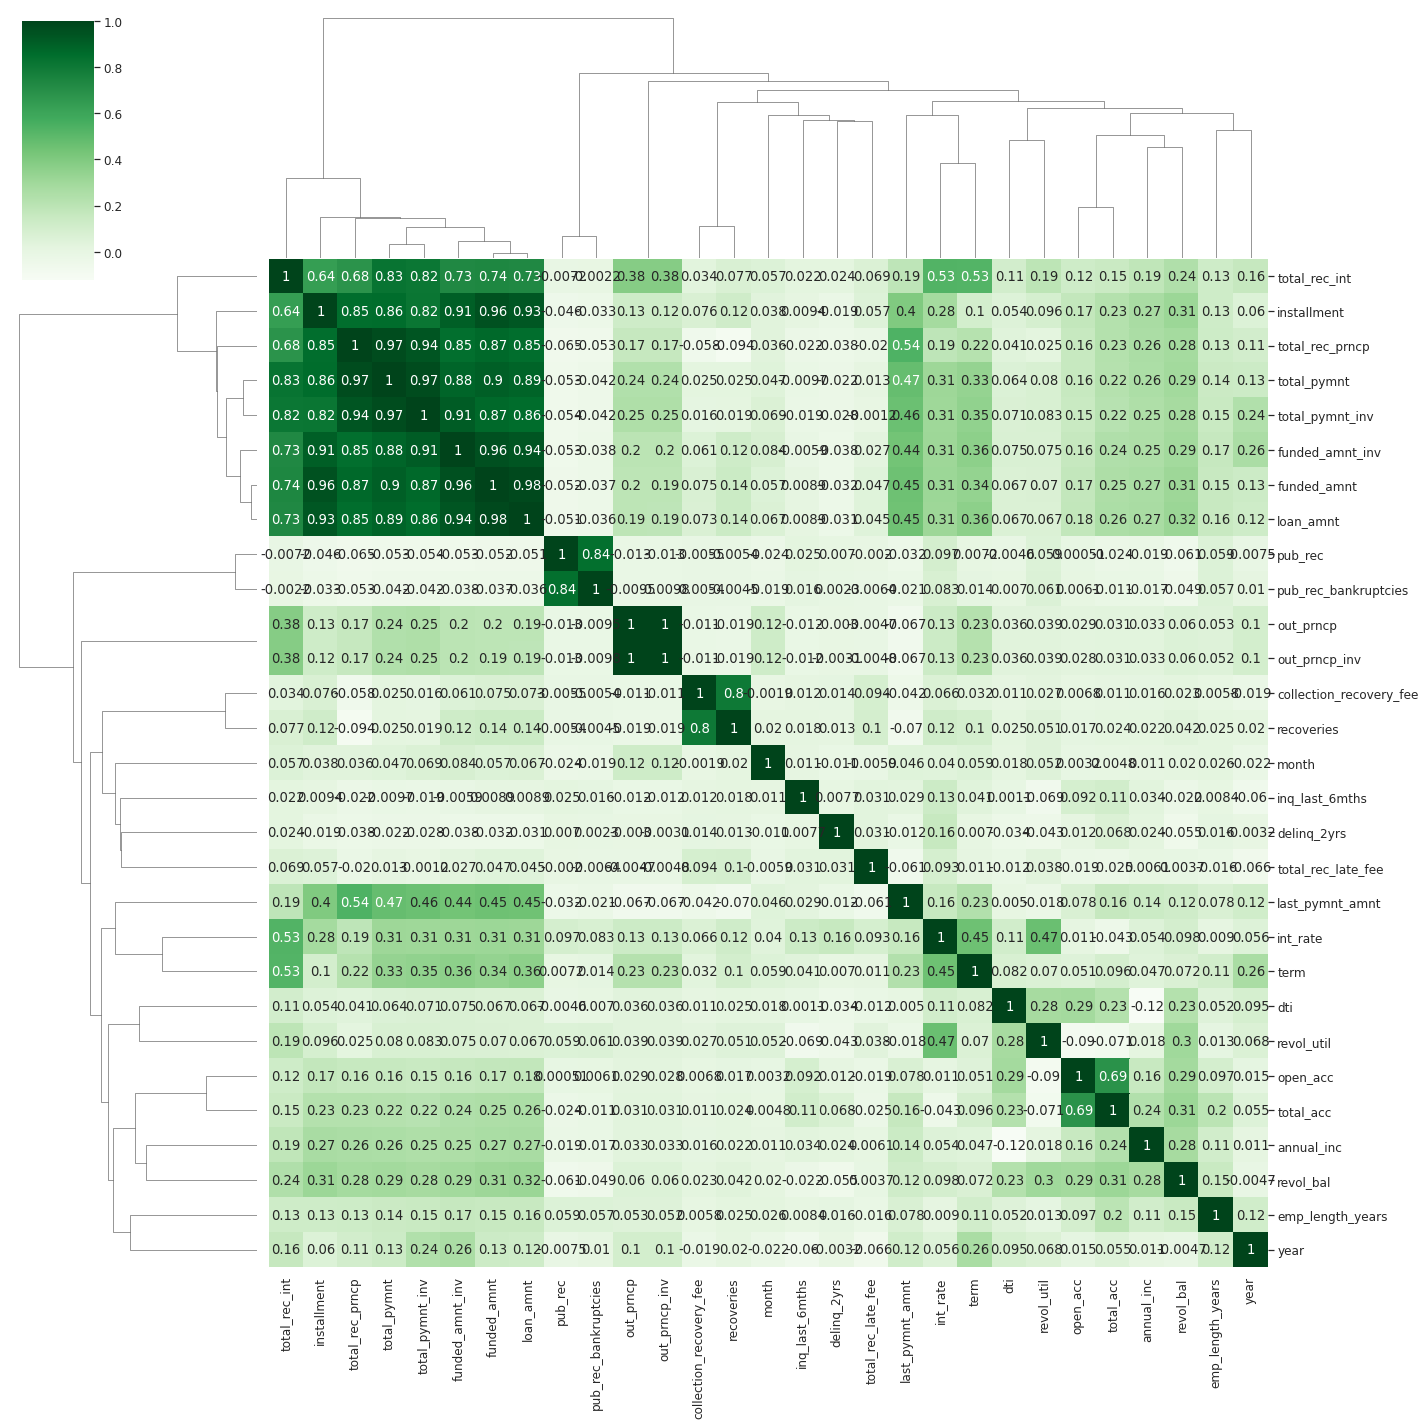

In [105]:
df2 = df[df.columns.difference(['income_loan_perecentage', 'loan_approved_perecentage', 'loan_invested_perecentage'])]
loan_correlation = df2.corr()
sns.set(font_scale=1.1)
sns.clustermap(loan_correlation,annot=True,figsize=(20, 20),cmap="Greens")
plt.show()

## Observation
there is a strong corelation between total_rec_int, total_rec_prncp, installment, total_pymnt, total_pymnt_inv, funded_amnt, funded_amnt_inv, loan_amnt

Also strong corelation between
   * pub_rec and pub_rec_bankruptcies
   * collection_recovery_fee recoveries

Same corealation
   * out_prncp out_prncp_inv



Negative corelation
   * dti, annual_income
   * revol_util, open_account
   * revol_util, total_account

deleting out_prncp_inv as it has same corelation with out_prncp

In [106]:
del df["out_prncp_inv"]

/home/surajit/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/surajit/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/surajit/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/surajit/anaconda3/lib/p

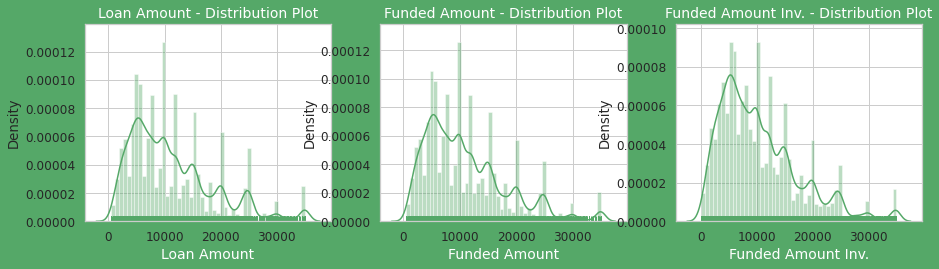

In [107]:
# Quantitative Variables

plt.figure(figsize=(15,8),facecolor='g')
sns.set_style("whitegrid")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.distplot(df['loan_amnt'],rug = True, color = "g")
ax.set_title('Loan Amount - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.distplot(df['funded_amnt'],rug = True, color = "g")
ax.set_title('Funded Amount - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Funded Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 3)
ax = sns.distplot(df['funded_amnt_inv'],rug = True, color = "g")
ax.set_title('Funded Amount Inv. - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Funded Amount Inv.',fontsize=14,color='w')
plt.show()



# Observation: 
Distribution of amounts for all three types look very similar.

/home/surajit/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/surajit/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


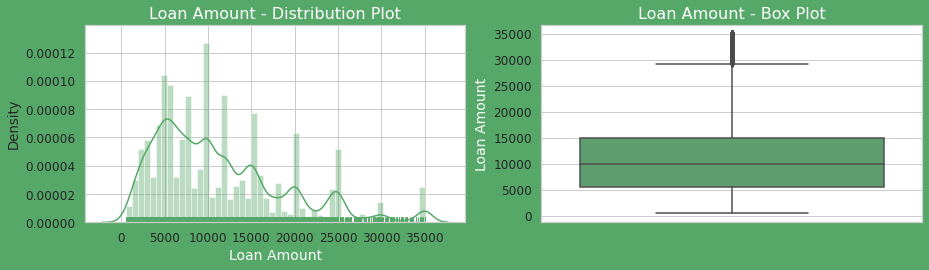

In [108]:
# Univariate Analysis on Loan amount-Quantitative Variables

plt.figure(figsize=(15,8),facecolor='g')
sns.set_style("whitegrid")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(df['loan_amnt'],rug = True, color="g")
ax.set_title('Loan Amount - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=df['loan_amnt'], color="g")
ax.set_title('Loan Amount - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Loan Amount',fontsize=14,color='w')
plt.show()

# Observations :
Most of the Loan amounts are in range of 5000 - 15000

/home/surajit/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/surajit/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


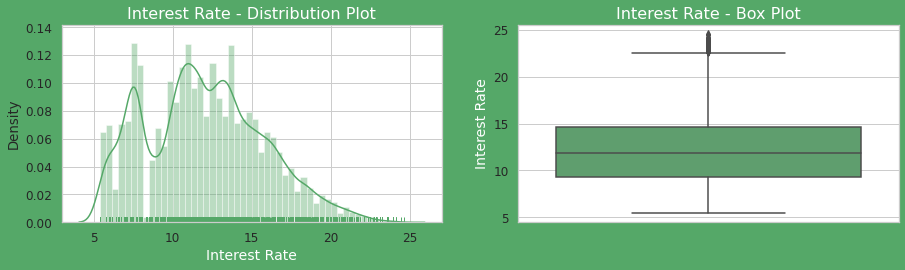

In [109]:
# Univariate Analysis on int rate-Quantitative Variables

plt.figure(figsize=(15,8),facecolor='g')
sns.set_style("whitegrid")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(df['int_rate'],rug = True, color="g")
ax.set_title('Interest Rate - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=df['int_rate'], color="g")
ax.set_title('Interest Rate - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color='w')
plt.show()

# Observation
most of the interst rate is 9-15

/home/surajit/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/surajit/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


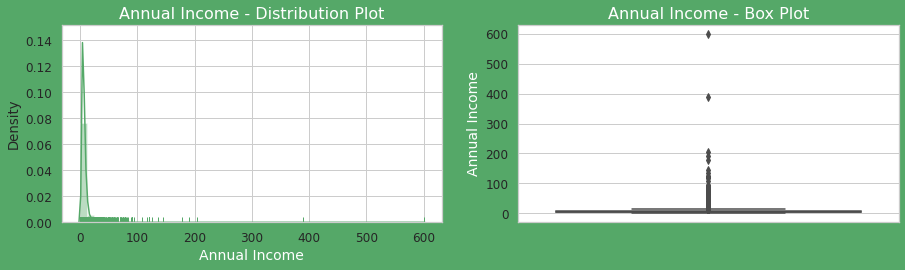

In [110]:
# Univariate Analysis on annual_inc-Quantitative Variables

plt.figure(figsize=(15,8),facecolor='g')
sns.set_style("whitegrid")
plt.ticklabel_format(style='plain', axis='y')
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(df['annual_inc'],rug = True, color="g")
ax.set_title('Annual Income - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Annual Income',fontsize=14,color='w')
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=df['annual_inc'], color="g")
ax.set_title('Annual Income - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Annual Income',fontsize=14,color='w')

plt.ticklabel_format(style='plain', axis='y')

plt.show()

In [111]:
df["annual_inc"].describe()

count    39640.000000
mean         6.901151
std          6.383688
min          0.400000
25%          4.050000
50%          5.900000
75%          8.240800
max        600.000000
Name: annual_inc, dtype: float64

/home/surajit/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/surajit/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


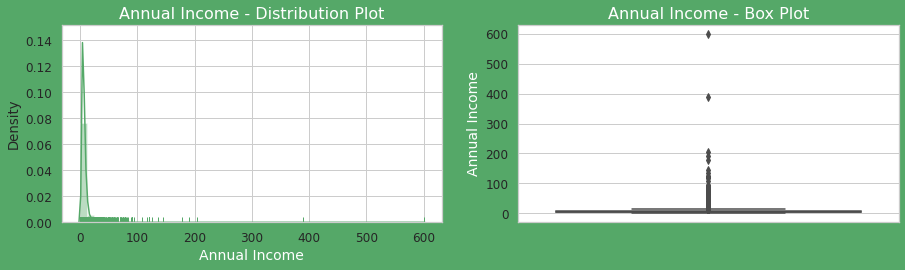

In [112]:
# Univariate Analysis on annual_inc-Quantitative Variables

plt.figure(figsize=(15,8),facecolor='g')
sns.set_style("whitegrid")

# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(df['annual_inc'],rug = True, color="g")
ax.set_title('Annual Income - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Annual Income',fontsize=14,color='w')

# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=df['annual_inc'], color="g")
ax.set_title('Annual Income - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Annual Income',fontsize=14,color='w')


plt.show()

#### observation
Annual income is 4-8L range

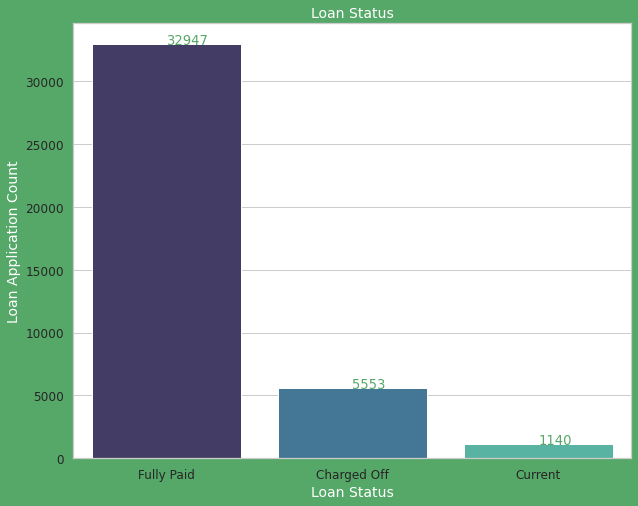

In [113]:
# Uniariate Analysis - Unordered Categorical Variables - Loan Status

plt.figure(figsize=(10,8),facecolor='g')
sns.set_style("whitegrid")
ax = sns.countplot(x="loan_status",data=df,palette='mako', color="g")
ax.set_title('Loan Status',fontsize=14,color='w')
ax.set_xlabel('Loan Status',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')            
# To show count of values above bars
s=df['loan_status'].value_counts()
for i, v in s.reset_index().iterrows():
    ax.text(i, v.loan_status + 0.3 , v.loan_status, color='g')

# Observations :
# Below plot shows that close to 14% loans were charged off out of total loan issued.

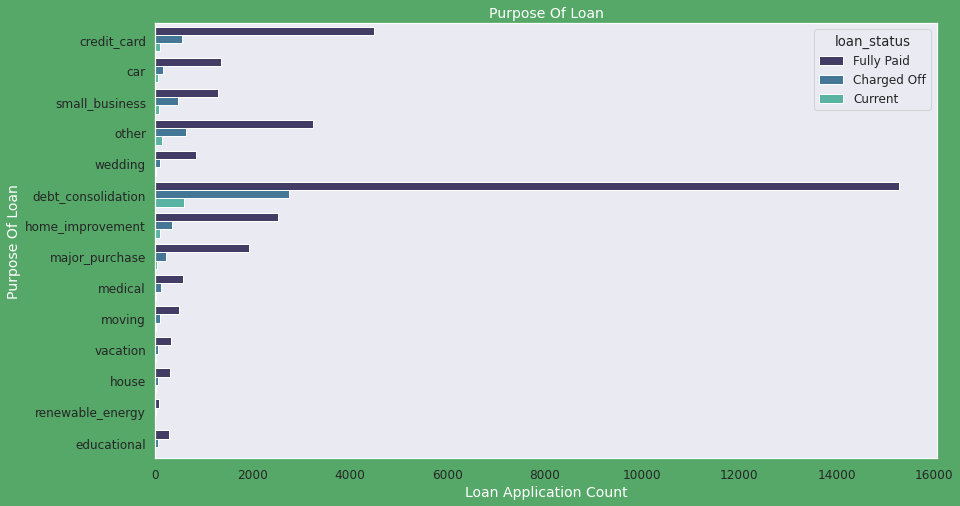

In [114]:
# Uniariate Analysis - Unordered Categorical Variables - Purpose Of Loan

plt.figure(figsize=(14,8),facecolor='g')
sns.set_style("dark")
ax = sns.countplot(y="purpose",data=df,hue='loan_status',palette='mako', color="g")
ax.set_title('Purpose Of Loan',fontsize=14,color='w')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()



# Observations :
most of the loans were taken for the purpose of debt consolidation & paying credit card bill.

Number of chraged off count also high too for these loans.

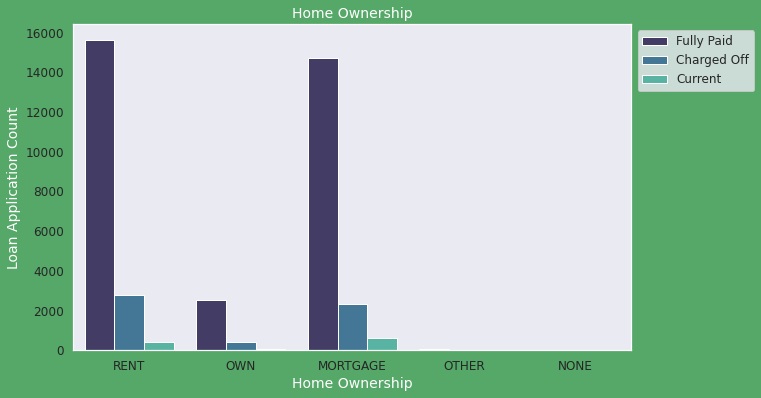

In [115]:
# Uniariate Analysis - Unordered Categorical Variables - Home Ownership

plt.figure(figsize=(10,6),facecolor='g')
ax = sns.countplot(x="home_ownership",data=df,hue='loan_status',palette='mako')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14,color='w')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

# Observations :
Most of them living in rented home or mortgazed their home.
these categories has high charged off too.

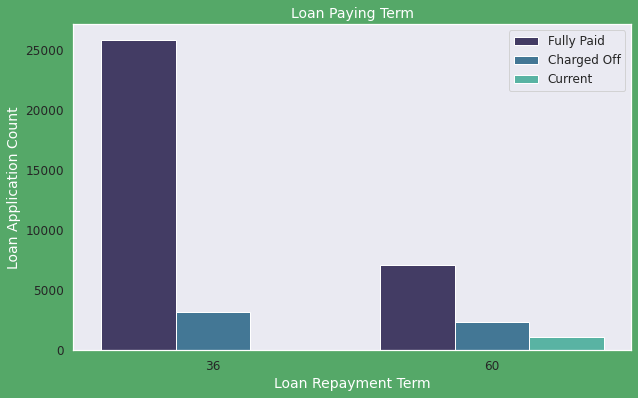

In [116]:
# Uniariate Analysis - Ordered Categorical Variables- Loan Paying Term

plt.figure(figsize=(10,6),facecolor='g')
ax = sns.countplot(x="term",data=df,hue='loan_status',palette='mako')
ax.set_title('Loan Paying Term',fontsize=14,color='w')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()



# Observations
those who had taken loan to repay in 60 months had more % of number of applicants getting 
charged off as compared to applicants who had taken loan for 36 months.

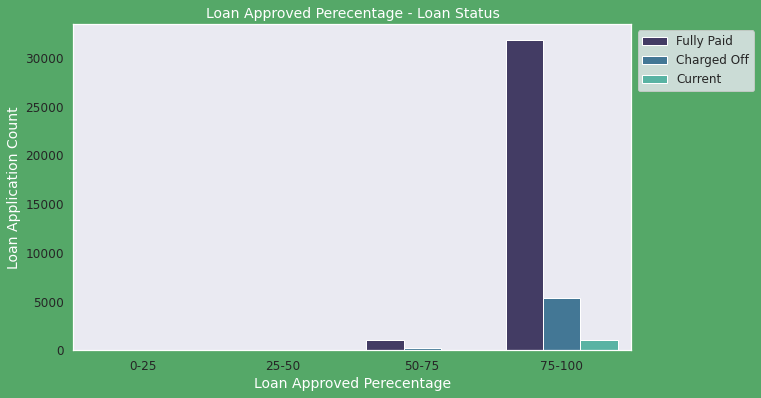

In [117]:
# Uniariate Analysis - loan_approved_perecentage- loan_status
plt.figure(figsize=(10,6),facecolor='g')
ax = sns.countplot(x="loan_approved_perecentage_cats",data=df,hue='loan_status',palette='mako')
ax.set_title('Loan Approved Perecentage - Loan Status',fontsize=14,color='w')
ax.set_xlabel('Loan Approved Perecentage',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

# Observations
75-100 approved loans has maximum charge-off

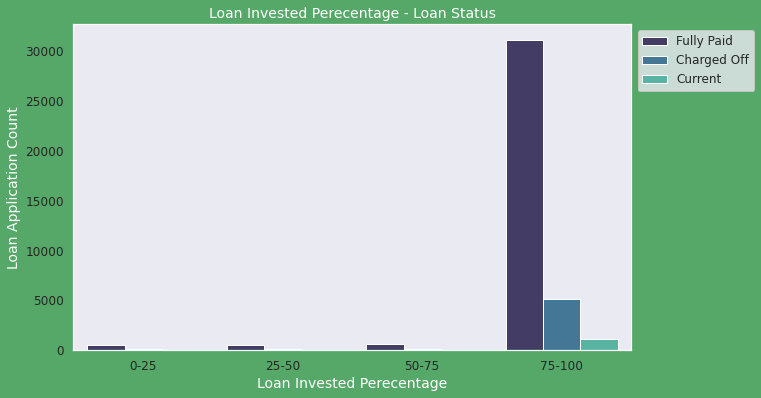

In [118]:
# Uniariate Analysis - loan_invested_perecentage- loan_status
plt.figure(figsize=(10,6),facecolor='g')
ax = sns.countplot(x="loan_invested_perecentage_cats",data=df,hue='loan_status',palette='mako')
ax.set_title('Loan Invested Perecentage - Loan Status',fontsize=14,color='w')
ax.set_xlabel('Loan Invested Perecentage',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

# Observations

75-100 invested loans has maximum charge-off

# Bivariate

In [119]:
# Bivariate Analysis on purpose of Loan against Chargedoff_Proportion.

purpose_vs_loan = df.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Current'] + purpose_vs_loan['Fully Paid'] 
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,purpose,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
11,small_business,465.0,74.0,1279.0,1818.0,0.255776
10,renewable_energy,18.0,1.0,83.0,102.0,0.176471
3,educational,53.0,0.0,269.0,322.0,0.164596
8,moving,92.0,7.0,484.0,583.0,0.157804
9,other,623.0,128.0,3231.0,3982.0,0.156454
7,medical,105.0,12.0,575.0,692.0,0.151734
5,house,57.0,14.0,308.0,379.0,0.150396
2,debt_consolidation,2738.0,586.0,15287.0,18611.0,0.147117
12,vacation,53.0,6.0,322.0,381.0,0.139108
4,home_improvement,343.0,101.0,2527.0,2971.0,0.115449


# Observations:
small Business applicants have high chnaces of getting charged off. <br />
renewable_energy where chanrged off count is less as compare to other categories.

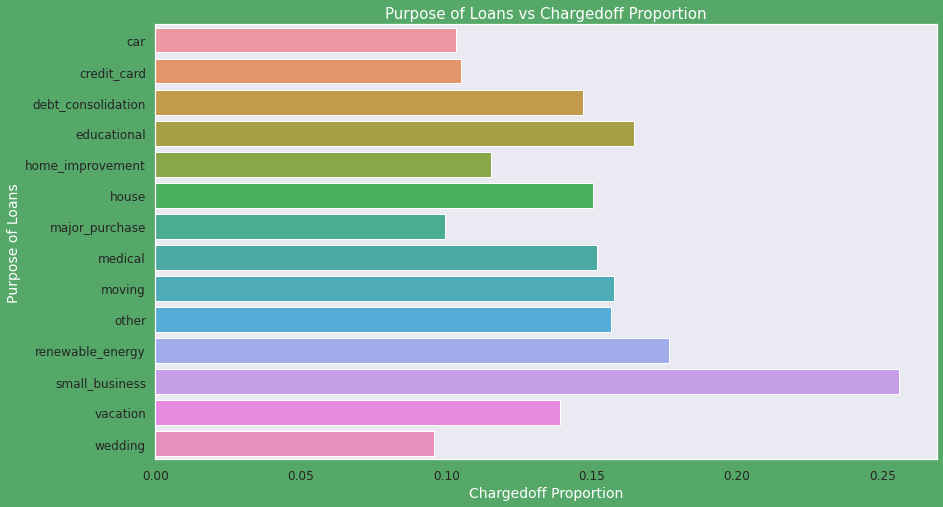

In [120]:
fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='g')
ax1.set_title('Purpose of Loans vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(y='purpose', x='Chargedoff_Proportion', data=purpose_vs_loan)
ax1.set_ylabel('Purpose of Loans',fontsize=14,color='w')
ax1.set_xlabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

In [121]:
# Bivariate Analysis on grade against Chargedoff_Proportion

grade_vs_loan = df.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Current'] + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)



loan_status,grade,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
6,G,99,17,198,314,0.315287
5,F,317,73,656,1046,0.303059
4,E,706,179,1948,2833,0.249206
3,D,1105,222,3967,5294,0.208727
2,C,1321,264,6486,8071,0.163672
1,B,1409,345,10250,12004,0.117378
0,A,596,40,9442,10078,0.059139


# Observations:
Grade "A" has very less chances of charged off. <br/>
Grade "F" and "G" have very high chances of charged off.<br/>
Chances of charged off is increasing with grade moving from "A" towards "G"<br/>
We can also colclude, the data privided already labelled as in form grade. where A is less chance and G is highest charagedoff proprtion

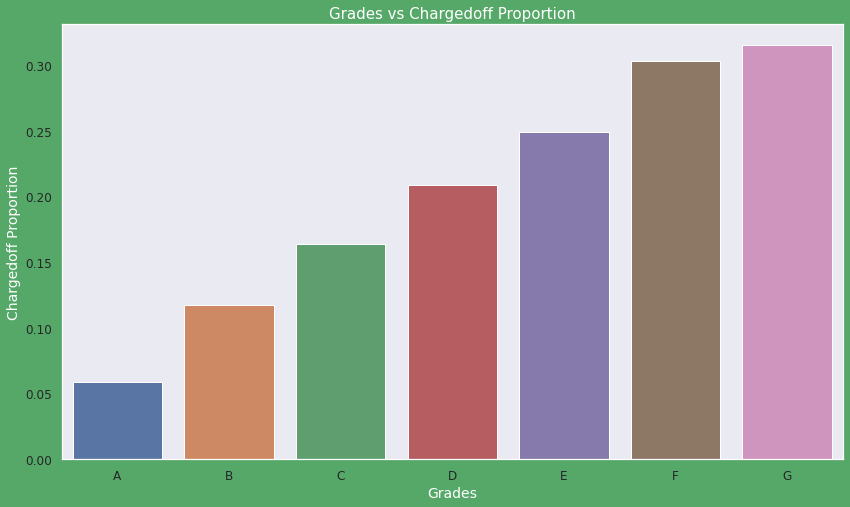

In [122]:
fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='g')
ax1.set_title('Grades vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Grades',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color ='w')
plt.show()


In [123]:
# Bivariate Analysis on sub grade against Chargedoff_Proportion

grade_vs_loan = df.groupby(['sub_grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Current'] + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,sub_grade,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
29,F5,54.0,5.0,59.0,118.0,0.457627
32,G3,19.0,3.0,26.0,48.0,0.395833
31,G2,28.0,1.0,49.0,78.0,0.358974
34,G5,10.0,1.0,19.0,30.0,0.333333
28,F4,52.0,17.0,97.0,166.0,0.313253
30,G1,29.0,10.0,63.0,102.0,0.284314
26,F2,69.0,16.0,163.0,248.0,0.278226
25,F1,91.0,24.0,214.0,329.0,0.276596
23,E4,125.0,30.0,298.0,453.0,0.275938
27,F3,51.0,11.0,123.0,185.0,0.275676


# Observations:
sub Grades of "A" has very less chances of charged off. <br>
sub Grades of "F" and "G" have very high chances of charged off. <br>

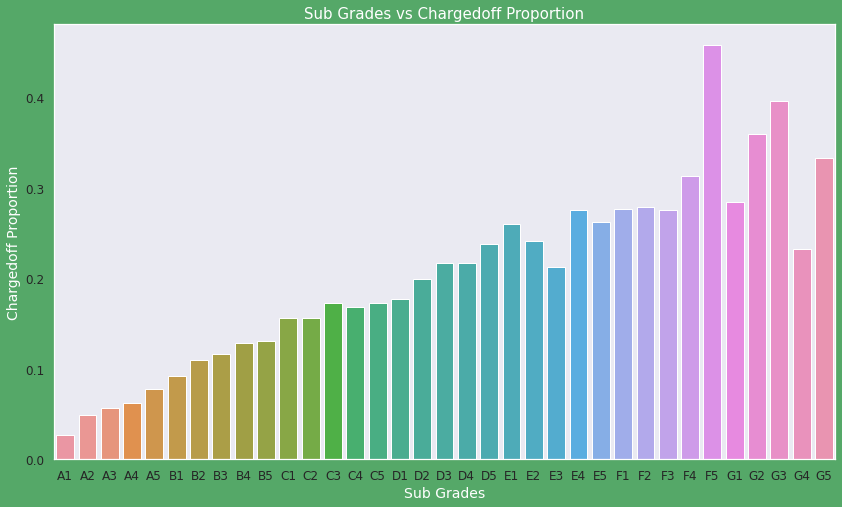

In [124]:

fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='g')
ax1.set_title('Sub Grades vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='sub_grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Sub Grades',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

In [125]:
# Bivariate Analysis on employment length against Chargedoff_Proportion

emplen_vs_loan = df.groupby(['emp_length_years', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emplen_vs_loan['Total'] = emplen_vs_loan['Charged Off'] + emplen_vs_loan['Current'] + emplen_vs_loan['Fully Paid'] 
emplen_vs_loan['Chargedoff_Proportion'] = emplen_vs_loan['Charged Off'] / emplen_vs_loan['Total']
emplen_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,emp_length_years,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
4,4.0,675,136,3683,4494,0.150200
10,10.0,1322,391,7157,8870,0.149042
7,7.0,262,62,1448,1772,0.147856
0,0.5,631,75,3868,4574,0.137954
1,1.0,445,71,2713,3229,0.137814
6,6.0,306,61,1861,2228,0.137343
5,5.0,448,88,2736,3272,0.136919
8,8.0,200,44,1232,1476,0.135501
3,3.0,548,83,3457,4088,0.134051
2,2.0,561,97,3724,4382,0.128024


# Observations:
Those who are 4 years of work experience have high chances of getting charged off. <br>
This seems random and can be ignored for further analysis

In [126]:
del df["emp_length_years"]

In [127]:
# Bivariate Analysis on address state against Chargedoff_Proportion

state_vs_loan = df.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
state_vs_loan['Total'] = state_vs_loan['Charged Off'] + state_vs_loan['Current'] + state_vs_loan['Fully Paid'] 
state_vs_loan['Chargedoff_Proportion'] = state_vs_loan['Charged Off'] / state_vs_loan['Total']
state_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,addr_state,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
28,NE,3.0,0.0,2.0,5.0,0.600000
32,NV,108.0,18.0,371.0,497.0,0.217304
0,AK,15.0,2.0,63.0,80.0,0.187500
40,SD,12.0,2.0,50.0,64.0,0.187500
9,FL,501.0,85.0,2277.0,2863.0,0.174991
13,ID,1.0,0.0,5.0,6.0,0.166667
24,MO,111.0,16.0,556.0,683.0,0.162518
11,HI,28.0,8.0,138.0,174.0,0.160920
31,NM,30.0,6.0,153.0,189.0,0.158730
4,CA,1105.0,150.0,5823.0,7078.0,0.156118


# Observations:
states NE has very high chances of charged off but number of applications are too low to make any decisions. <br>
ME,IN and IA states shows zero number of charged offs

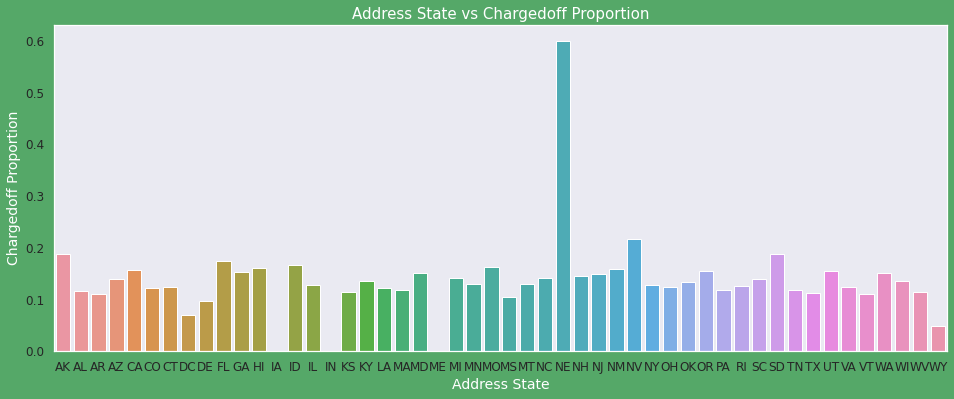

In [128]:
fig, ax1 = plt.subplots(figsize=(16, 6),facecolor='g')
ax1.set_title('Address State vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='addr_state', y='Chargedoff_Proportion', data=state_vs_loan)
ax1.set_xlabel('Address State',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

In [129]:
# Bivariate Analysis on verification_status against Chargedoff_Proportion

verfy_vs_loan = df.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verfy_vs_loan['Total'] = verfy_vs_loan['Charged Off'] + verfy_vs_loan['Current'] + verfy_vs_loan['Fully Paid'] 
verfy_vs_loan['Chargedoff_Proportion'] = verfy_vs_loan['Charged Off'] / verfy_vs_loan['Total']
verfy_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,verification_status,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
2,Verified,2030,603,10154,12787,0.158755
1,Source Verified,1420,310,8243,9973,0.142384
0,Not Verified,2103,227,14550,16880,0.124585


# Observations:
There is not much difference in charged off proportion.
This variable doesn't provide any insights for charged off and can be dropped

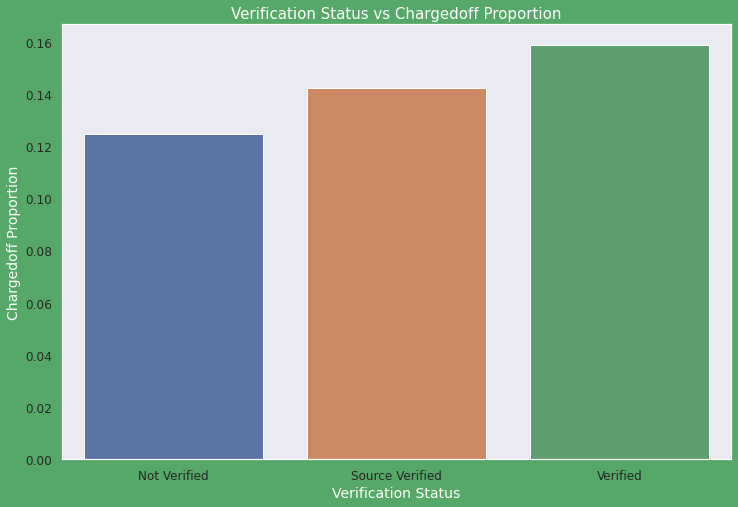

In [130]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='g')
ax1.set_title('Verification Status vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='verification_status', y='Chargedoff_Proportion', data=verfy_vs_loan)
ax1.set_xlabel('Verification Status',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

In [131]:
del df["verification_status"]

In [132]:
# Bivariate Analysis on pub_rec_bankruptcies against Chargedoff_Proportion

bankruptcies_vs_loan = df.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_vs_loan['Total']=bankruptcies_vs_loan['Charged Off']+bankruptcies_vs_loan['Current']+bankruptcies_vs_loan['Fully Paid'] 
bankruptcies_vs_loan['Chargedoff_Proportion'] = bankruptcies_vs_loan['Charged Off'] / bankruptcies_vs_loan['Total']
bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,pub_rec_bankruptcies,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
2,2.0,2,2,3,7,0.285714
1,1.0,360,37,1271,1668,0.215827
0,0.0,5191,1101,31673,37965,0.136731


# Observations:
Those who already have pub_rec_bankruptcies value 1, have charged off proportion higher than who have no pub_rec_bankruptcies. <br>

This also true that who has defaulted before has more chances of dafaulting in future as well.<br>

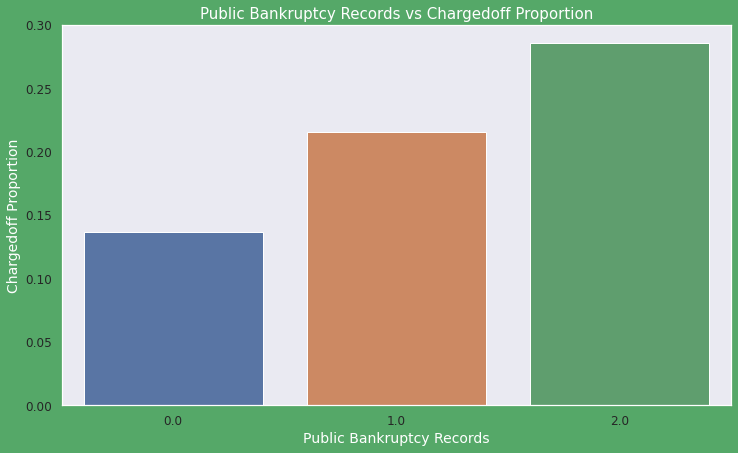

In [133]:
fig, ax1 = plt.subplots(figsize=(12, 7),facecolor='g')
ax1.set_title('Public Bankruptcy Records vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='pub_rec_bankruptcies', y='Chargedoff_Proportion', data=bankruptcies_vs_loan)
ax1.set_xlabel('Public Bankruptcy Records',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

In [134]:
# Bivariate Analysis on Derogatory Public Record against Chargedoff_Proportion

bankruptcies_vs_loan = df.groupby(['pub_rec', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_vs_loan['Total']=bankruptcies_vs_loan['Charged Off']+bankruptcies_vs_loan['Current']+bankruptcies_vs_loan['Fully Paid'] 
bankruptcies_vs_loan['Chargedoff_Proportion'] = bankruptcies_vs_loan['Charged Off'] / bankruptcies_vs_loan['Total']
bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,pub_rec,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
1,1,450.0,43.0,1556.0,2049.0,0.219619
2,2,10.0,3.0,38.0,51.0,0.196078
0,0,5093.0,1094.0,31344.0,37531.0,0.135701
3,3,0.0,0.0,7.0,7.0,0.000000
4,4,0.0,0.0,2.0,2.0,0.000000


# Observations:
Those who already have pub_rec value 1 or 2 have charged off chances higher.
pub_rec count 3-4 has less numbers so cannot reach on any conclusions. Can be removed.

In [135]:
del df["pub_rec"]

In [136]:
# Bivariate Analysis on annual income against Chargedoff_Proportion -

inc_range_vs_loan = df.groupby(['annual_inc_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Current'] + inc_range_vs_loan['Fully Paid'] 
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc_cats,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
0,0-2,223,9,942,1174,0.189949
1,2-5,2345,346,11832,14523,0.161468
2,5-8,1869,409,11302,13580,0.137629
3,8-12,769,251,6066,7086,0.108524
4,20 +,287,109,2295,2691,0.106652


# Obersvations :
id annual income increases charged off proportion is less

<ipython-input-137-5768d8dc1041>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df_rec['recovery_prcnt']=((loan_df_rec['recoveries']/loan_df_rec['loan_amnt']) * 100)


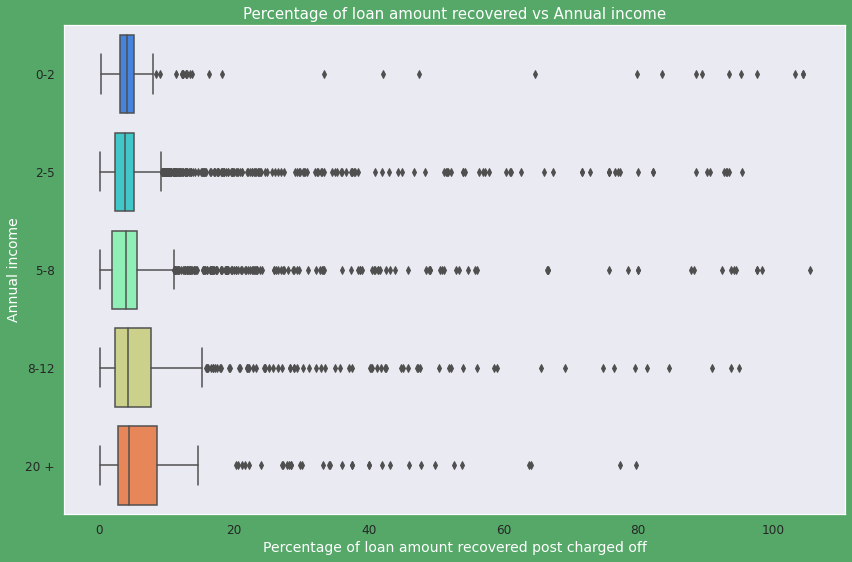

In [137]:
# Bivariate Analysis - Recoveries vs Annual income
# Box Plot
df['recoveries']=pd.to_numeric(df['recoveries'],errors='coerce')
loan_df_rec=df[df['recoveries'] > 0.00]

# calculate recovery percentage 
loan_df_rec['recovery_prcnt']=((loan_df_rec['recoveries']/loan_df_rec['loan_amnt']) * 100) 

# plot
plt.figure(figsize=(14,9),facecolor='g')
ax=sns.boxplot(x='recovery_prcnt',y='annual_inc_cats',data=loan_df_rec,palette='rainbow')
ax.set_title('Percentage of loan amount recovered vs Annual income',fontsize=15,color = 'w')
ax.set_ylabel('Annual income',fontsize=14,color = 'w')
ax.set_xlabel('Percentage of loan amount recovered post charged off',fontsize=14,color = 'w')
plt.show()

# Observations:
# Higher percentage of loan amount is recovered when annual income is high.
# Plot shows no significant variation but there is slight increase in recovery percentage with increase in annual income.

# Observations: 
charged off are less for more anual income holders

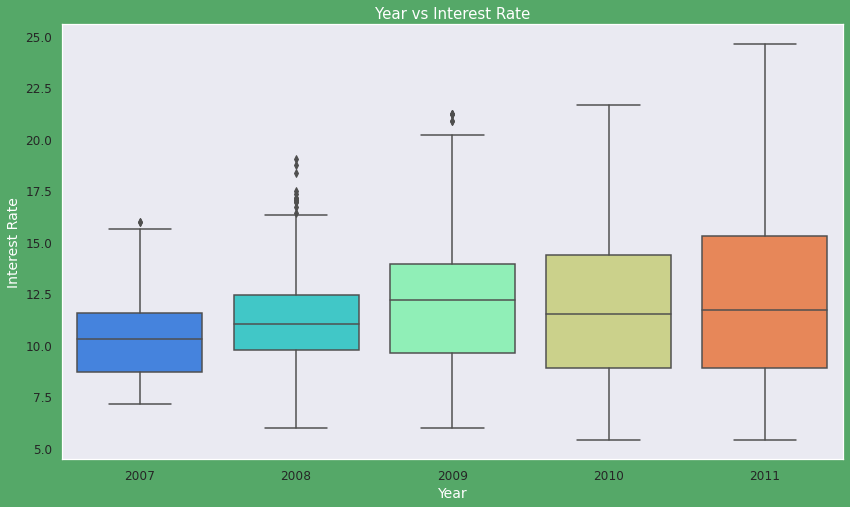

In [138]:
# Bivariate Analysis - year vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='g')
ax = sns.boxplot(y='int_rate', x='year', data =df,palette='rainbow')
ax.set_title('Year vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Year',fontsize=14,color = 'w')
plt.show()


# Observations:
Intrest rate is increasing slowly with increase in year but after 2009 its stable

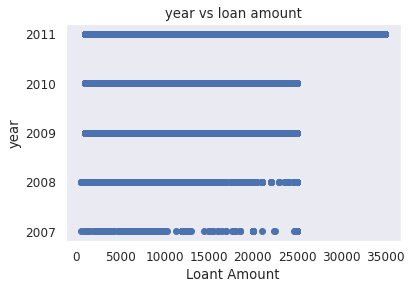

In [139]:
# Draw the scatter plot

plt.scatter(df["loan_amnt"], df["year"])

plt.title('year vs loan amount')

plt.ylabel('year')

plt.xlabel('Loant Amount')

plt.show()

# Observations :
as year increases loan amount increase also

# Multivariate Analysis

In [140]:

df_pair = df[['loan_amnt', 'annual_inc', 'year','int_rate','loan_status']].copy()
df_pair.head()


,loan_amnt,annual_inc,year,int_rate,loan_status
0,5000,2.4000,2011,10.65,Fully Paid
1,2500,3.0000,2011,15.27,Charged Off
2,2400,1.2252,2011,15.96,Fully Paid
3,10000,4.9200,2011,13.49,Fully Paid
4,3000,8.0000,2011,12.69,Current


/home/surajit/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/surajit/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


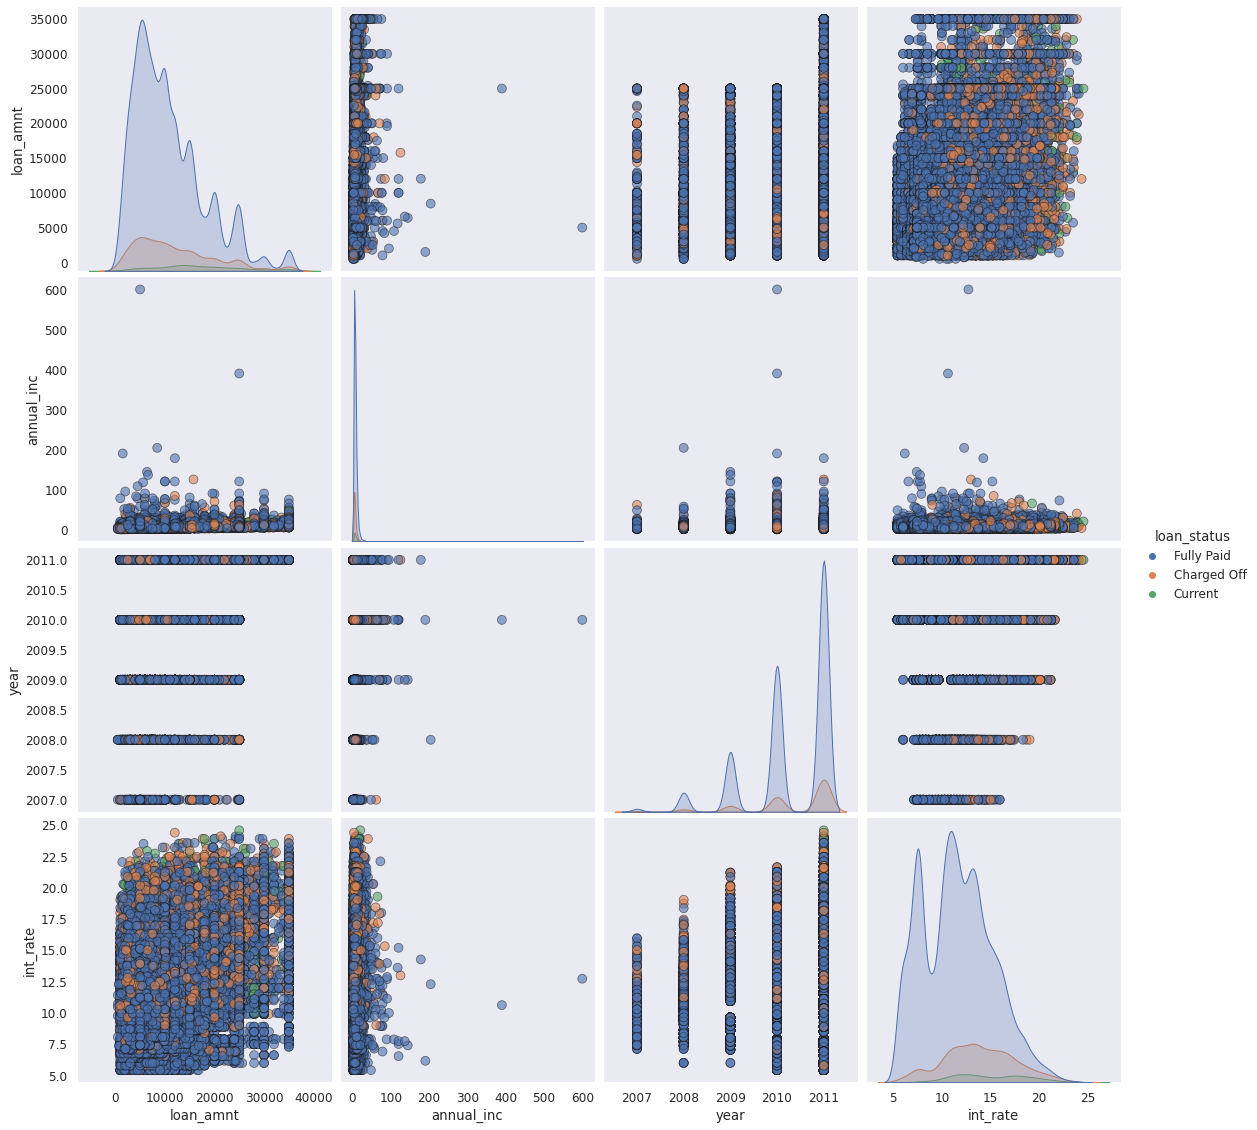

In [141]:
sns.pairplot(df_pair, hue = 'loan_status', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()

# Observation:
Higher the intrest rate higher charged off ratio <br>
increase in number of charged off with increase in year.<br>
intrest rate is increasing with loan amount increase<br>